<a href="https://colab.research.google.com/github/Medona-Jugi-P/Anomaly-Detection-in-Water-Quality/blob/main/Anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive

drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Anomaly_Detection/water-treatment.csv")
df.head()

,DATE,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,D-1/3/90,44101,1.50,7.8,?,407,166,66.3,4.5,2110,...,2000,?,58.8,95.5,?,70.0,?,79.4,87.3,99.6
1,D-2/3/90,39024,3.00,7.7,?,443,214,69.2,6.5,2660,...,2590,?,60.7,94.8,?,80.8,?,79.5,92.1,100
2,D-4/3/90,32229,5.00,7.6,?,528,186,69.9,3.4,1666,...,1888,?,58.2,95.6,?,52.9,?,75.8,88.7,98.5
3,D-5/3/90,35023,3.50,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,D-6/3/90,36924,1.50,8.0,242,496,176,64.8,4.0,2110,...,2120,?,62.7,95.6,?,71.0,92.1,78.2,87.5,99.5


In [ ]:
#check data type of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DATE      527 non-null    object 
 1   Q-E       527 non-null    object 
 2   ZN-E      527 non-null    object 
 3   PH-E      527 non-null    float64
 4   DBO-E     527 non-null    object 
 5   DQO-E     527 non-null    object 
 6   SS-E      527 non-null    object 
 7   SSV-E     527 non-null    object 
 8   SED-E     527 non-null    object 
 9   COND-E    527 non-null    int64  
 10  PH-P      527 non-null    float64
 11  DBO-P     527 non-null    object 
 12  SS-P      527 non-null    int64  
 13  SSV-P     527 non-null    object 
 14  SED-P     527 non-null    object 
 15  COND-P    527 non-null    int64  
 16  PH-D      527 non-null    float64
 17  DBO-D     527 non-null    object 
 18  DQO-D     527 non-null    object 
 19  SS-D      527 non-null    object 
 20  SSV-D     527 non-null    object

In [ ]:
#replacing ? with NaN 
df.replace('?', np.nan, inplace=True)

In [ ]:
# convert the 'A' column from object to float
df = df.astype(float)

In [ ]:
# Checking for the missing values after replacing ?
count_NaN = df.isna().sum()
count_NaN

Q-E         18
ZN-E         3
PH-E         0
DBO-E       23
DQO-E        6
SS-E         1
SSV-E       11
SED-E       25
COND-E       0
PH-P         0
DBO-P       40
SS-P         0
SSV-P       11
SED-P       24
COND-P       0
PH-D         0
DBO-D       28
DQO-D        9
SS-D         2
SSV-D       13
SED-D       25
COND-D       0
PH-S         1
DBO-S       23
DQO-S       18
SS-S         5
SSV-S       17
SED-S       28
COND-S       1
RD-DBO-P    62
RD-SS-P      4
RD-SED-P    27
RD-DBO-S    40
RD-DQO-S    26
RD-DBO-G    36
RD-DQO-G    25
RD-SS-G      8
RD-SED-G    31
dtype: int64

In [ ]:
df

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
DATE,,,,,,,,,,,,,,,,,,,,,
D-1/3/90,44101.0,1.50,7.8,NaN,407.0,166.0,66.3,4.5,2110.0,7.9,...,2000.0,NaN,58.8,95.5,NaN,70.0,NaN,79.4,87.3,99.6
D-2/3/90,39024.0,3.00,7.7,NaN,443.0,214.0,69.2,6.5,2660.0,7.7,...,2590.0,NaN,60.7,94.8,NaN,80.8,NaN,79.5,92.1,100.0
D-4/3/90,32229.0,5.00,7.6,NaN,528.0,186.0,69.9,3.4,1666.0,7.7,...,1888.0,NaN,58.2,95.6,NaN,52.9,NaN,75.8,88.7,98.5
D-5/3/90,35023.0,3.50,7.9,205.0,588.0,192.0,65.6,4.5,2430.0,7.8,...,1840.0,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100.0
D-6/3/90,36924.0,1.50,8.0,242.0,496.0,176.0,64.8,4.0,2110.0,7.9,...,2120.0,NaN,62.7,95.6,NaN,71.0,92.1,78.2,87.5,99.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D-26/8/91,32723.0,0.16,7.7,93.0,252.0,176.0,56.8,2.3,894.0,7.7,...,942.0,NaN,62.3,93.3,69.8,75.9,79.6,78.6,96.6,99.6
D-27/8/91,33535.0,0.32,7.8,192.0,346.0,172.0,68.6,4.0,988.0,7.8,...,950.0,NaN,58.3,97.8,83.0,59.1,91.1,74.6,90.7,100.0
D-28/8/91,32922.0,0.30,7.4,139.0,367.0,180.0,64.4,3.0,1060.0,7.5,...,1136.0,NaN,65.0,97.1,76.2,66.4,82.0,77.1,88.9,99.0


In [ ]:
# drop rows with missing values
df.dropna(inplace=True)
df

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
DATE,,,,,,,,,,,,,,,,,,,,,
D-5/3/90,35023.0,3.50,7.9,205.0,588.0,192.0,65.6,4.5,2430.0,7.8,...,1840.0,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100.0
D-11/3/90,29156.0,2.50,7.7,206.0,451.0,194.0,69.1,4.5,1249.0,7.7,...,1338.0,46.1,43.6,92.5,85.6,58.2,92.2,73.8,90.2,99.4
D-12/3/90,39246.0,2.00,7.8,172.0,506.0,200.0,69.0,5.0,1865.0,7.8,...,1616.0,21.2,59.7,90.8,88.4,66.1,89.0,69.0,86.5,99.6
D-13/3/90,42393.0,0.70,7.9,189.0,478.0,230.0,67.0,5.5,1410.0,8.1,...,1575.0,0.6,45.8,92.0,11.6,25.7,19.6,36.0,43.0,36.4
D-18/3/90,40923.0,3.50,7.6,146.0,329.0,188.0,57.4,2.5,1300.0,7.6,...,1545.0,32.7,33.3,90.0,82.6,61.3,87.0,71.4,78.2,99.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D-19/8/91,32363.0,0.10,7.6,159.0,310.0,146.0,68.5,1.6,1096.0,7.6,...,1083.0,25.2,61.4,91.2,78.6,65.1,86.8,81.0,89.0,99.4
D-20/8/91,31437.0,0.47,7.6,132.0,304.0,148.0,64.9,2.0,939.0,7.7,...,1012.0,45.6,60.3,94.4,82.5,72.9,89.4,86.2,91.2,99.5
D-22/8/91,28088.0,0.20,7.5,153.0,307.0,124.0,82.3,2.5,1044.0,7.6,...,1038.0,40.5,54.4,94.0,89.7,75.5,93.5,85.0,90.3,100.0


In [ ]:
# Checking for the missing values after droping NaN
count_NaN = df.isna().sum()
count_NaN

Q-E         0
ZN-E        0
PH-E        0
DBO-E       0
DQO-E       0
SS-E        0
SSV-E       0
SED-E       0
COND-E      0
PH-P        0
DBO-P       0
SS-P        0
SSV-P       0
SED-P       0
COND-P      0
PH-D        0
DBO-D       0
DQO-D       0
SS-D        0
SSV-D       0
SED-D       0
COND-D      0
PH-S        0
DBO-S       0
DQO-S       0
SS-S        0
SSV-S       0
SED-S       0
COND-S      0
RD-DBO-P    0
RD-SS-P     0
RD-SED-P    0
RD-DBO-S    0
RD-DQO-S    0
RD-DBO-G    0
RD-DQO-G    0
RD-SS-G     0
RD-SED-G    0
dtype: int64

In [ ]:
print(df.columns)

Index(['Q-E', 'ZN-E', 'PH-E', 'DBO-E', 'DQO-E', 'SS-E', 'SSV-E ', 'SED-E',
       'COND-E', 'PH-P', 'DBO-P', 'SS-P', 'SSV-P', 'SED-P', 'COND-P', 'PH-D',
       'DBO-D', 'DQO-D', 'SS-D', 'SSV-D', 'SED-D', 'COND-D', 'PH-S', 'DBO-S',
       'DQO-S', 'SS-S', 'SSV-S', 'SED-S', 'COND-S', 'RD-DBO-P', 'RD-SS-P',
       'RD-SED-P', 'RD-DBO-S', 'RD-DQO-S', 'RD-DBO-G', 'RD-DQO-G', 'RD-SS-G',
       'RD-SED-G'],
      dtype='object')


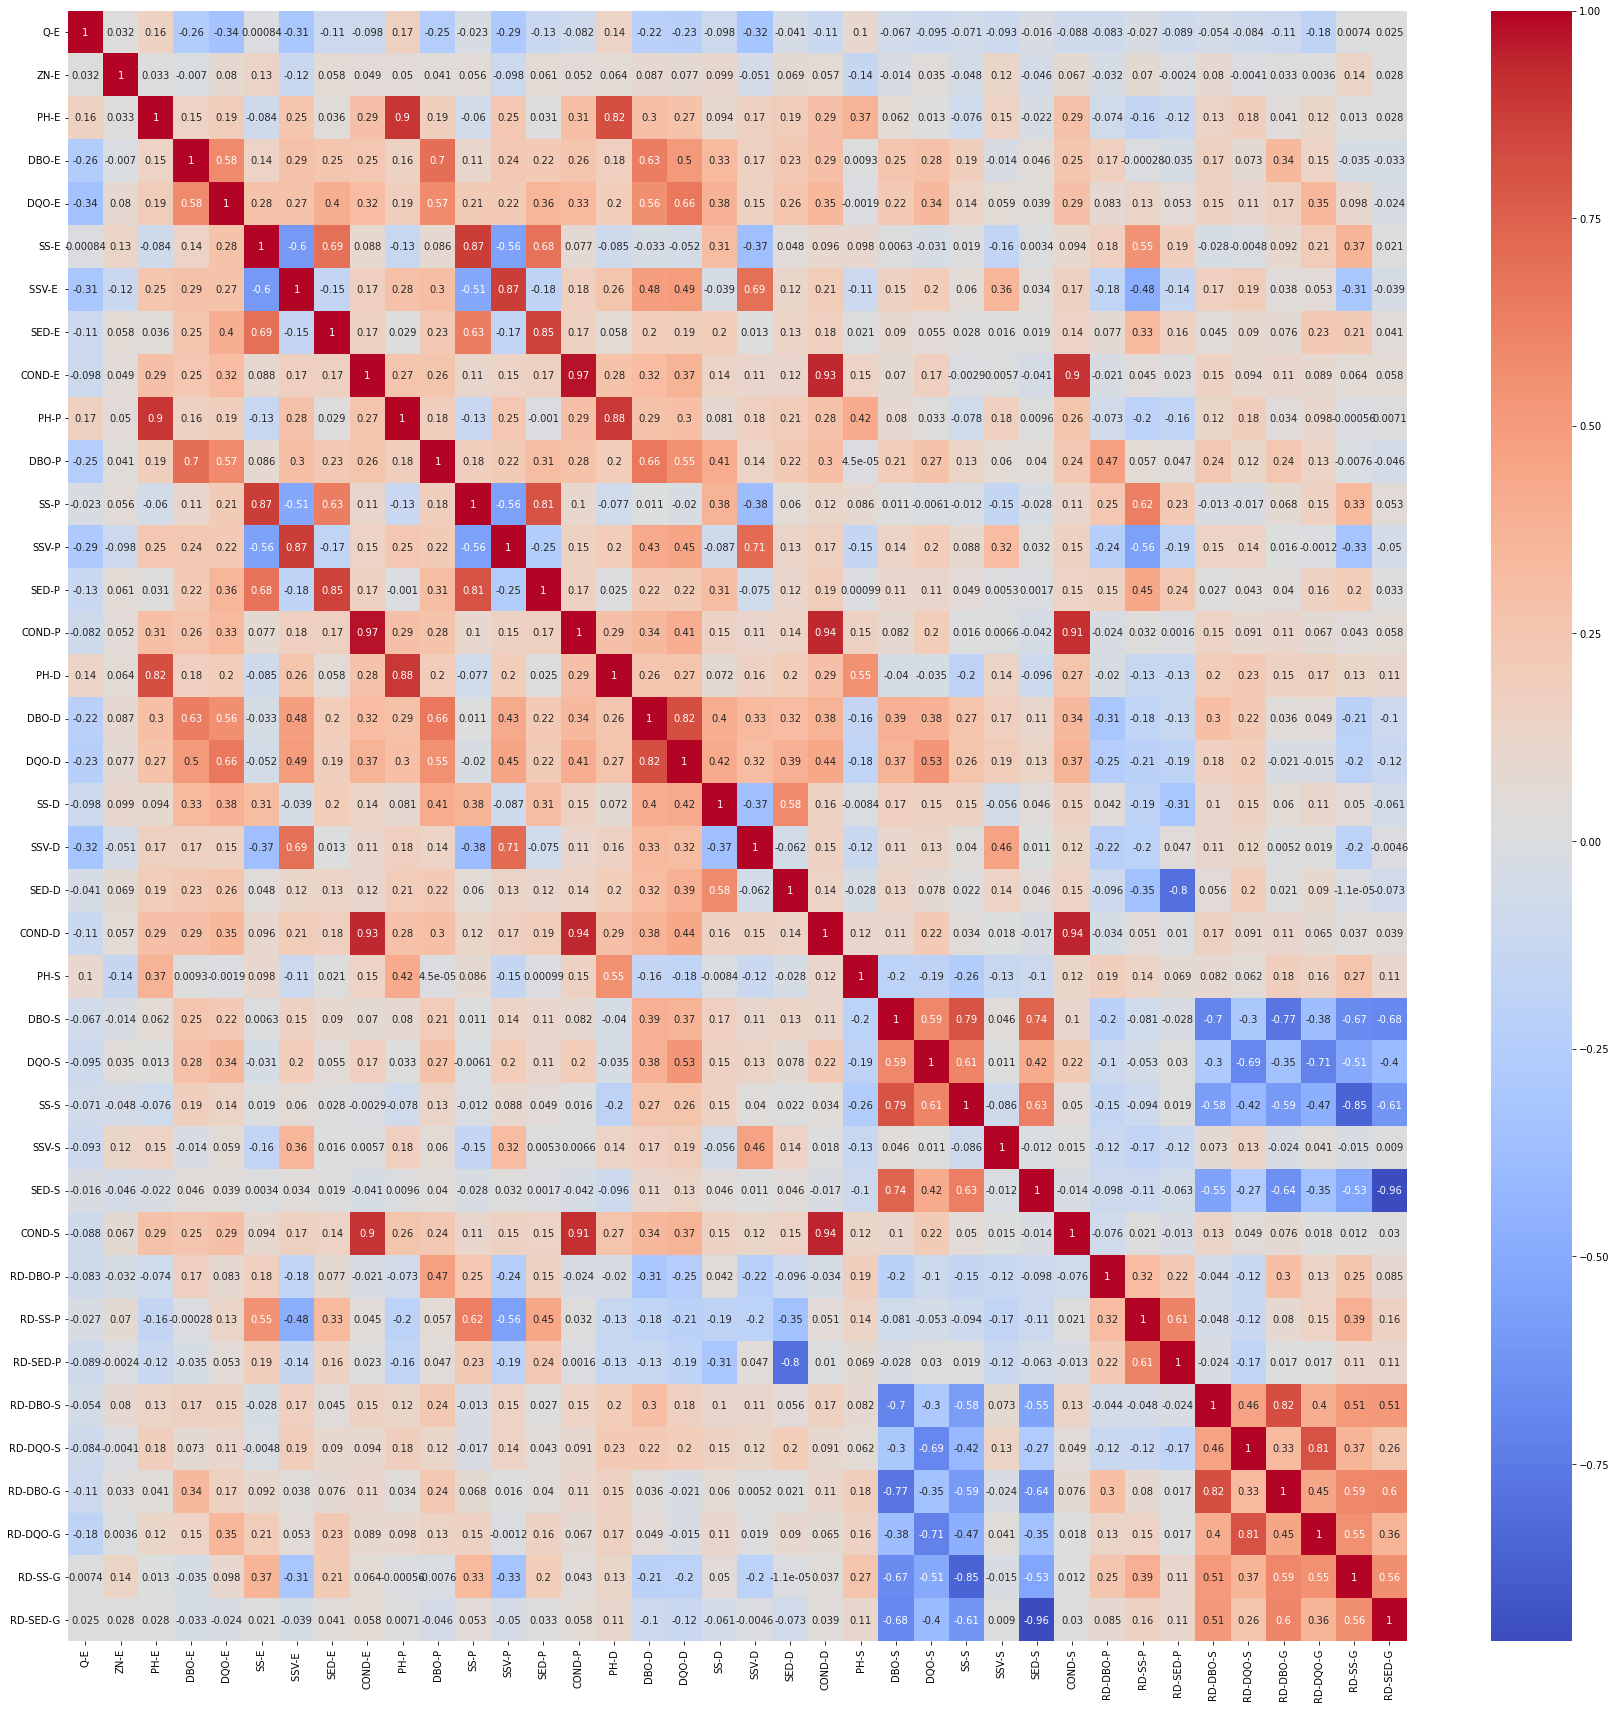

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# calculate the correlation matrix
corr_matrix = df.corr()

# set the figure size
plt.figure(figsize=(30, 30))

# create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# display the plot
plt.show()